# 학령인구 감소로 인한 대학교 폐쇄
## 폐쇄된 대학 분석 및 해결방안


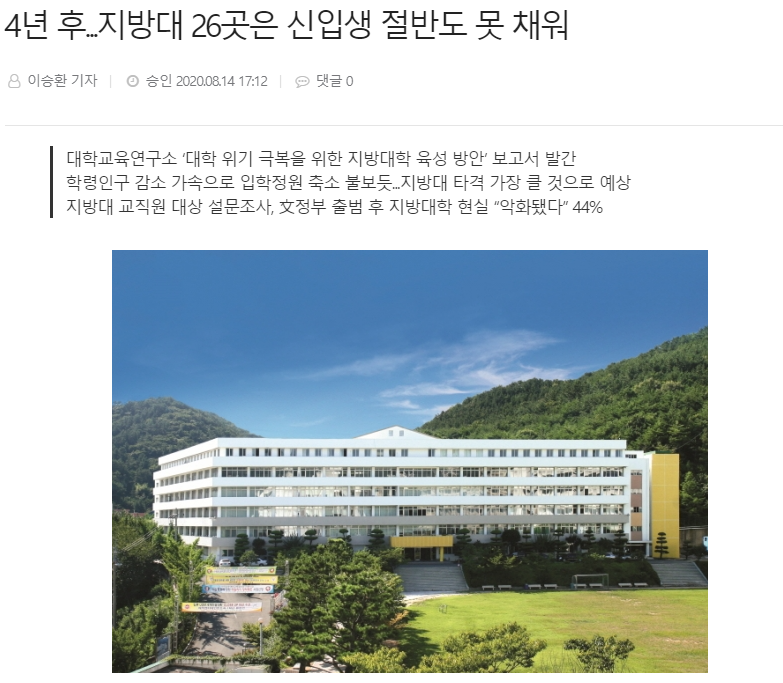

In [89]:
from IPython.display import Image
Image("대학기사.PNG")

# 1. 연도별 입학자수 분석

In [90]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [91]:
df1 = pd.read_excel('연도별_입학정원.xlsx')

df1 = df1.loc[:, ~df1.columns.str.contains('Unnamed')]
years = df1.columns
df1 = df1.transpose()
df1.columns = ['전체수', '일반대', '전문대', '국공립', '사립', '수도권(서울)',
               '수도권(경기인천)', '수도권 전체', '지방(광역시)',
               '지방(비광역시)', '지방 전체']
df1

,전체수,일반대,전문대,국공립,사립,수도권(서울),수도권(경기인천),수도권 전체,지방(광역시),지방(비광역시),지방 전체
1980년,201055,120435,80620,49569,151486,52621,25773,78394,21467,101194,122661
1985년,319000,210517,108483,63511,255489,80405,48633,129038,63527,126435,189962
1990년,339511,208991,130520,65180,274331,68805,61200,130005,102816,106690,209506
1995년,495300,279830,215470,84345,410955,85895,91555,177450,128210,189640,317850
2000년,646275,352100,294175,97829,548446,97121,122264,219385,155145,271745,426890
2005년,625541,359451,266090,95869,529672,91833,127079,218912,147530,259099,406629
2010년,570927,347615,223312,82649,488278,87301,118520,205821,134029,231077,365106
2015년,520664,337350,183314,83161,437503,90292,106487,196779,128364,195521,323885
2019년,485592,319148,166444,77540,408052,87437,100210,187647,120544,177401,297945


In [92]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=years, y=df1['수도권 전체'],
                        mode='lines',
                        name='수도권'))
fig.add_trace(go.Scatter(x=years, y=df1['지방 전체'],
                        mode='lines+markers',
                        name='지방'))
fig.add_trace(go.Scatter(x=years, y=df1['전체수'],
                        mode='lines',
                        name='전체'))

max_val = max(df1['지방 전체'])

for i in df1.index:
    if df1.loc[i]['지방 전체'] == max_val:
        line_x = i

fig.add_trace(go.Scatter(x=[line_x]*3, y=[min(df1['수도권 전체']), 
                                    df1.loc[line_x]['지방 전체'],
                                    df1.loc[line_x]['전체수']],
                        mode='lines',
                        marker_color='yellow',
                        name='최다 입학자 연도'))

fig.update_layout(title='대학 입학자 수')
fig.show()

+ 지역별, 대학별 입학자수 그래프
+ 학령이구의 감소에 따라 2000년 이후 감소하는 걸 볼 수 있다.

# 2. 2018년 이후 3년마다 대학 입학자 수 변화량

In [93]:
df2 = pd.read_excel('입학자_수_추계.xlsx')
df2

,연도별 입학자수,2018년입학자수,2021년입학자수,2024년입학자수,2037년입학자수,2018년대비감축률,2019년대비감축률,2020년대비감축률
0,연도별,18년,21년,24년,37년,21년,24년,37년
1,전체,489701,414126,384002,314767,-15.4,-21.6,-35.7
2,대학,319136,278518,261527,221333,-12.7,-18.1,-30.6
3,전문,170565,135609,122475,93434,-20.5,-28.2,-45.2
4,국공립,79089,70236,66193,56874,-11.2,-16.3,-28.1
5,사립,410612,343890,317809,257892,-16.2,-22.6,-37.2
6,서울,89392,81972,78925,71455,-8.3,-11.7,-20.1
7,경기인천,101433,87037,81018,66712,-14.2,-20.1,-34.2
8,소계,190825,169009,159943,138167,-11.4,-16.2,-27.6
9,광역시,121505,100670,92253,73435,-17.1,-24.1,-39.6


In [94]:
# zero_list = [0]
# year = ['2018년', '2021년', '2024년', '2027년']
    
# fig1=go.Figure(data=[
#                go.Bar(y=year,
#                      x=[df2.iloc[1][i] / 10000 for i in range(1, 5)],
#                      name='입학자수 / 10k',
#                      orientation='h',
#                      base=0,
#                      marker_color='royalblue'), 
#                go.Bar(y=year,
#                      x=zero_list + [df2.iloc[1][i] for i in range(5, 8)],
#                      name='감소량',
#                      orientation='h',
#                      base=0,
#                      marker_color='sandybrown')])
# fig1.update_layout(barmode='stack',
#                    title='전체 대학 입학자 수 및 변화량')

# fig2=go.Figure(data=[
#                go.Bar(y=year,
#                      x=[df2.iloc[8][i] / 10000 for i in range(1, 5)],
#                      name='입학자수 / 10k',
#                      orientation='h',
#                      base=0,
#                      marker_color='royalblue'), 
#                go.Bar(y=year,
#                      x=zero_list + [df2.iloc[8][i] for i in range(5, 8)],
#                      name='감소량',
#                      orientation='h',
#                      base=0,
#                      marker_color='sandybrown')])
# fig2.update_layout(barmode='stack',
#                    title='수도권대학 입학자 수 및 변화량')

# fig3=go.Figure(data=[
#                go.Bar(y=year,
#                      x=[df2.iloc[11][i] / 10000 for i in range(1, 5)],
#                      name='입학자수 / 10k',
#                      orientation='h',
#                      base=0,
#                      marker_color='royalblue'), 
#                go.Bar(y=year,
#                      x=zero_list + [df2.iloc[11][i] for i in range(5, 8)],
#                      name='감소량',
#                      orientation='h',
#                      base=0,
#                      marker_color='sandybrown')])
# fig3.update_layout(barmode='stack',
#                    title='지방대학 입학자 수 및 변화량')

# fig1.show()
# fig2.show()
# fig3.show()

In [95]:
years = ['2018년', '2021년', '2024년', '2027년']

fig = make_subplots(specs=[[{"secondary_y": True}]],
                   subplot_titles=['지역별 입학자수 감소량'])

fig.add_trace(go.Bar(x=years, y=[df2.iloc[1][i] for i in range(1, 5)],
                         name='전체 입학자수',
                         marker_color='lightseagreen'),
                         secondary_y=False)
fig.add_trace(go.Scatter(x=years[1:], y=[df2.iloc[1][i] * (-1) for i in range(5, 8)],
                         name='전체대학 입학자수 감소량',
                         mode='lines+markers',
                         marker_color='yellow'),
                         secondary_y=True)
fig.add_trace(go.Scatter(x=years[1:], y=[df2.iloc[8][i] * (-1) for i in range(5, 8)],
                         name='수도권대학 입학자수 감소량',
                         mode='lines+markers',
                         marker_color='orange'),
                         secondary_y=True)
fig.add_trace(go.Scatter(x=years[1:], y=[df2.iloc[11][i] * (-1) for i in range(5, 8)],
                         name='지방대학 입학자수 감소량',
                         mode='lines+markers',
                         marker_color='crimson'),
                         secondary_y=True)
fig.update_layout(bargap=0.6)
fig.show()

+ 지방 대학의 2018년~2027년 감소량이 제일 큰 것을 볼 수 있다.

# 3. 현재까지 폐쇄된 대학 위치 정보

In [96]:
df3 = pd.read_excel('폐교 사립대학 현황.xlsx')

# for i in range(16):
#     if df3.iloc[i][7] == '×':
#         df3.iloc[i][7] = False
#     elif df3.iloc[i][7] == '○':
#         df3.iloc[i][7] = True

df3

,구분,대학,학교법인,소재지,개교 연도,폐교 연도,폐교 유형,법인 해산
0,일반대,광주예대,하남학원,전남,1997년,2000년,폐쇄명령,×
1,일반대,아시아대,아시아교육재단,경북,2003년,2008년,폐쇄명령,○
2,일반대,명 신 대,신명학원,전남,2000년,2012년,폐쇄명령,×
3,일반대,선교청대,대정학원,충남,2003년,2013년,폐쇄명령,○
4,일반대,건 동 대,백암교육재단,경북,2006년,2013년,자진폐교,×
5,일반대,경북외대,경북외국어대,대구,2005년,2014년,자진폐교,○
6,일반대,대구외대,경북교육재단,경북,2003년,2018년,폐쇄명령,○
7,일반대,한 중 대,광희학원,강원,2000년,2018년,폐쇄명령,×
8,일반대,서 남 대,서남학원,전북,1991년,2018년,폐쇄명령,○
9,전문대,성 화 대,세림학원,전남,1997년,2012년,폐쇄명령,○


+ 총 16개의 대학이 사라졌다.

In [97]:
# !pip install geopy

In [98]:
# !pip install folium

In [99]:
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

info_list = []
circle_size = []
area_list = list(set(df3['소재지']))
geolocator = Nominatim(user_agent='tutorial')

for i in range(len(area_list)):
    circle_size.append(list(df3['소재지']).count(area_list[i]) * 8)
    info_list.append([geolocator.geocode(area_list[i]).latitude, geolocator.geocode(area_list[i]).longitude])

daejeon_location = geolocator.geocode('대전') # 지도 중심 설정
map_osm = folium.Map(location=[daejeon_location.latitude, daejeon_location.longitude],
                    zoom_start=6.5,
                    title='폐교된 대학 위치')

for i in range(len(area_list)):
    folium.CircleMarker(info_list[i], color='tomato', radius=circle_size[i], fill=True).add_to(map_osm)

metropolitan_area = [[geolocator.geocode('연천군').latitude, geolocator.geocode('연천군').longitude],
        [geolocator.geocode('평택시').latitude, geolocator.geocode('평택시').longitude],
        [geolocator.geocode('강화군').latitude, geolocator.geocode('강화군').longitude],
        [geolocator.geocode('여주시').latitude, geolocator.geocode('여주시').longitude]]

folium.Rectangle(bounds=metropolitan_area, tooltip='lightcoral', weight=1.8, color='saddlebrown').add_to(map_osm)
map_osm

- 16개의 대학 중 한 곳을 제외하고 모두 지방에 위치해 있다.

# 4. 지방대학 폐쇄의 문제점 분석
1. 대학 구성원들에 대한 설문조사
2. 국내외 주요 대학 학생 수 비교

In [100]:
df4 = pd.read_excel('지방대학 위기의 원인.xlsx')

df4 = df4.drop(columns=['구분', '구분.1', '합계', '합계.1'])
df4 = df4.transpose().iloc[:, 0:2]
df4.columns = ["교수(강사포함)", "직원(조교포함)"]

fig = make_subplots(rows=1, cols=2,
                   specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=['교수(강사포함)', '직원(조교포함)'])
fig.add_trace(go.Pie(labels=df4.index, values=df4['교수(강사포함)'], 
                    name="교수(강사포함)"), 1, 1)
fig.add_trace(go.Pie(labels=df4.index, values=df4['직원(조교포함)'], 
                    name="직원(조교포함)"), 1, 2)
fig.show()
df4

,교수(강사포함),직원(조교포함)
학령 인구 감소,26.8,32.1
졸업생 취업/ 교수 채용 등에서 지방대 출신 차별,6.9,7.6
수도권 대학 중심의 정부 고등 교육 정책,20.8,16.3
산업체/문화 시설/ 정보 등의 수도권 집중,7.9,5.8
지방대 에대한 사회적 관심 부족,3.8,6.8
대학 재정 부족,12.9,17.6
설립‧운 영자의 부실 운영 및 부정 비리,12.9,9.8
민주적 의사 결정 구조의 결여,6.9,3.5
기 타,1.0,0.5


In [101]:
df5 = pd.read_excel("국내 및 외국 주요 대학 학생 수 비교.xlsx", header=1)
df5.rename(columns = {'대학명': '국내 대학', '학부 학생 수': '국내 대학 학생수',
                     '대학명.1': '외국 대학', '학부 학생 수.1': '외국 대학 학생수'}, inplace = True)

df5

,국내 대학,국내 대학 학생수,외국 대학,외국 대학 학생수
0,경희대,"26,430명",예일대(미국),"6,092명"
1,고려대,"21,165명(27,608명)",하버드대(미국),"6,788명"
2,서울대,"16,556명",스탠퍼드대(미국),"6,996명"
3,성균관대,"19,798명",다트머스(미국),"4,459명"
4,연세대,"19,084명(26,505명)",프린스턴(미국),"5,422명"
5,이화여대,"16,088명",옥스퍼드대(영국),"11,955명"
6,중앙대,"23,567명",케임브리지대(영국),"12,274명"
7,한국외대,"17,770명",동경대(일본),"14,058명"
8,한양대,"16,142명(25,165명)",교토대(일본),"12,992명"


+ 대학교수님과 직원분들을 대상으로 설문조사 실시
+ 이들 중 지방대학이 현재 위기라고 답한 사람만 다시 설문하여 얻은 데이터

In [102]:
# 다른 방법 찾아보기
# for i in range(df5.shape[0]):
#     domestic_students = (re.sub(r'\([^)]*\)', '', df5.iloc[i][1]).replace("명","").replace(",",""))
#     foreign_students = df5.iloc[i][3].replace("명","").replace(",","")
#     df5.iloc[i][1] = int(domestic_students)
#     df5.iloc[i][3] = int(foreign_students)
    
df5['국내 대학 학생수'] = df5['국내 대학 학생수'].str.replace(r"\(.*\)","").str.replace("명","").str.replace(",","").astype(int)
df5['외국 대학 학생수'] = df5['외국 대학 학생수'].str.replace("명","").str.replace(",","").astype(int)
    
domestic_circle_size = []
domestic_average = 0
foreign_circle_size = []
foreign_average = 0

for i in list(df5['국내 대학 학생수']):
    domestic_circle_size.append(i / 500)
    domestic_average += i
    
for i in list(df5['외국 대학 학생수']):
    foreign_circle_size.append(i / 500)
    foreign_average += i

domestic_average /= len(df5['국내 대학'])
foreign_average /= len(df5['외국 대학'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=df5['국내 대학'], 
                         y=df5['국내 대학 학생수'],
                         mode='markers',
                         marker=dict(size=domestic_circle_size, color='mediumorchid'),
                         name='국내 주요 대학 학생수'))
fig.add_trace(go.Scatter(x=df5['국내 대학'], 
                         y=[domestic_average] * len(df5['국내 대학']),
                         line=dict(color='purple', dash='dot'),
                         name='국내 주요 대학 평균 학생수'))
fig.add_trace(go.Scatter(x=df5['외국 대학'],
                         y=df5['외국 대학 학생수'],
                         mode='markers',
                         marker=dict(size=foreign_circle_size, color='tomato'),
                         name='외국 주요 대학 학생수'))
fig.add_trace(go.Scatter(x=df5['외국 대학'],
                         y=[foreign_average] * len(df5['외국 대학']),
                         line=dict(color='red', dash='dot'),
                         name='외국 주요 대학 평균 학생수'))

fig.update_layout(title='국내 대학 학생 수 vs 외국 대학 학생 수')
fig.show()

+ 전체적으로 국내 대학의 학생 수가 외국 대학의 학생 수보다 많다.
+ 지방 대학 폐쇄의 해결방안으로 전체 대학의 입학정원 수 축소를 생각해 볼 수 있다.

# 지방대학 폐쇄에 대한 해결방안 모색

In [103]:
df6 = pd.read_excel('10% 감축 시 입학정원 변화 시물레이션.xlsx', header=1)
df6.iloc[5:11, 1] = df6.iloc[5:11, 2]
df6.rename(columns={df6.columns[1]: '유형 및 지역',
                    '2021년 (A)': '2021년 입학정원(A)',
                    '2024년 (B)': '2024년 입학정원(B)',
                   '입학가능 인원(C)': '2024년 입학가능인원(C)'}, inplace=True)
df6 = df6.loc[:, ~df6.columns.str.contains('Unnamed')]
df6

,유형 및 지역,2021년 입학정원(A),감축인원,2024년 입학정원(B),2024년 입학가능인원(C),충원율① (C/B),충원율② (C/A)
0,NaN,492452,49245,443207,384002,86.6,78.0
1,대학,322111,32211,289900,261527,90.2,81.2
2,전문,170341,17034,153307,122475,79.9,71.9
3,국공립,79957,7996,71961,66193,92.0,82.8
4,사립,412495,41250,371246,317809,85.6,77.0
5,서울,89562,8956,80606,78925,97.9,88.1
6,경기인천,101576,10158,91418,81018,88.6,79.8
7,소계,191138,19114,172024,159943,93.0,83.7
8,광역시,122381,12238,110143,92253,83.8,75.4
9,비광역시,178933,17893,161040,131806,81.8,73.7


In [104]:
fig = make_subplots(specs=[[{"secondary_y": True}]],
                    horizontal_spacing=0.9,
                   subplot_titles=['10% 감축에 따른 입학 정원 충원율'])

fig.add_trace(go.Bar(x=[df6.columns[1], df6.columns[3], df6.columns[4]], 
                     y=[df6.iloc[7][1], df6.iloc[7][3], df6.iloc[7][4]],
                         name='수도권 대학 입학정원',
                         marker_color='darkcyan'),
                         secondary_y=False)
fig.add_trace(go.Bar(x=[df6.columns[1], df6.columns[3], df6.columns[4]], 
                     y=[df6.iloc[10][1], df6.iloc[10][3], df6.iloc[10][4]],
                         name='대학 입학정원',
                         marker_color='blue'),
                         secondary_y=False)
fig.add_trace(go.Scatter(x=[df6.columns[1], df6.columns[3]], 
                         y=[df6.iloc[7][1], df6.iloc[7][3]],
                         name='수도권 대학 입학정원 10% 감소',
                         line=dict(dash='dash', color='orange')),
                         secondary_y=False)
fig.add_trace(go.Scatter(x=[df6.columns[1], df6.columns[3]], 
                         y=[df6.iloc[10][1], df6.iloc[10][3]],
                         name='지방 대학 입학정원 10% 감소',
                         line=dict(dash='dash', color='red')),
                         secondary_y=False)

fig.add_trace(go.Bar(x=[df6.columns[5]], y=[df6.iloc[7][5]],
                         name='수도권 대학 충원율',
                        marker_color='wheat'),
                         secondary_y=True)
fig.add_trace(go.Bar(x=[df6.columns[5]], y=[df6.iloc[10][5]],
                         name='지방 대학 충원율',
                        marker_color='lightsalmon'),
                         secondary_y=True)

fig.update_layout(bargap=0.5, bargroupgap=0.1)
fig.show()

In [105]:
# del df6['구분']
# del df6['Unnamed: 1']

# for i in range(18, 11, -1):
#     if df6.iloc[i][0]:
#         df6 = df6.drop(index=[i])
        
# for i in range(1, 6):
#     if df6.iloc[i][0]:
#         df6 = df6.drop(index=[i])

# df6.rename(columns={'Unnamed: 2': '지역'}, inplace = True)
# df6.loc[0]['지역'] = '구분'

# fig = make_subplots(rows=1, cols=2,
#                    specs=[[{'type':'domain'}, {'type':'domain'}]], 
#                    subplot_titles=['10% 감소시 수도권 대학 충원율',
#                                    '10% 감소시 지방대학 충원율'])
# fig.add_trace(go.Pie(labels=[df6.columns[4], '2024년 신입생 미충원율'], 
#                      values=[df6.iloc[3][5], 100 - df6.iloc[3][5]]), 1, 1)
# fig.add_trace(go.Pie(labels=[df6.columns[4], '2024년 신입생 미충원율'], 
#                      values=[df6.iloc[6][5], 100 - df6.iloc[6][5]]), 1, 2)
# fig.update_traces(hole=.2, hoverinfo='label+percent', textinfo='value', 
#                   marker=dict(colors=['dodgerblue', 'orangered']))

# fig.show()

- 전체 대학 10% 감축시 입학정원 변화 시물레이션 분석
- 외국 주요 대학과의 비교를 통해 우리나라 주요 대학들의 입학자 수가 지나치게 많다는 걸 알게 되었고,
<br>
  전체 대학 감소로 지방 대학 폐쇄를 막는 데 기여 한다는 것을 알 수 있다.

# 최근 입학자수 변화량이 가장 큰 대학 찾기 및 원인 분석

In [106]:
df7 = pd.read_excel('2019학년도+4년제+국공립+대학+모집단위별+입학정원.xlsx')
df7.columns=['대학명', '분교/캠퍼스', '입학 정원', '구분',
                   '2019년 입학정원', '2018년 입학정원', '2017년 입학정원',
                   '2016년 입학정원', '2015년 입학정원']
df7

,대학명,분교/캠퍼스,입학 정원,구분,2019년 입학정원,2018년 입학정원,2017년 입학정원,2016년 입학정원,2015년 입학정원
0,NaN,NaN,NaN,NaN,2019,2018.0,2017.0,2016.0,2015.0
1,강릉원주대학교 (1946),강릉캠퍼스,입학 정원,주간,1344,1344.0,1344.0,1377.0,1466.0
2,NaN,NaN,NaN,계,1344,1344.0,1344.0,1377.0,1466.0
3,NaN,원주캠퍼스,입학 정원,주간,489,489.0,489.0,496.0,506.0
4,NaN,NaN,NaN,계,489,489.0,489.0,496.0,506.0
...,...,...,...,...,...,...,...,...,...
111,NaN,NaN,NaN,합계,1440,1440.0,1440.0,1451.0,1451.0
112,한밭대학교,본교,입학 정원,주간,1758,1436.0,1436.0,1451.0,1513.0
113,NaN,NaN,NaN,합계,1846,1846.0,1846.0,1861.0,1923.0
114,국·공립대학 총계(30교),NaN,입학 정원,주간,67497,66805.0,66820.0,68013.0,71903.0


In [107]:
max_increase_public = [0, 0]
max_decrease_public = [0, 10000]

for i in range(df7.shape[0]):
    if '대학교' in str(df7.loc[i][0]):
        val = df7.loc[i]['2019년 입학정원'] - df7.loc[i]['2015년 입학정원']
        if max_increase_public[1] < val:
            max_increase_public[1] = val
            max_increase_public[0] = i
        elif max_decrease_public[1] > val:
            max_decrease_public[1] = val
            max_decrease_public[0] = i

x_value = [df7.columns[i] for i in range(4, 9)]
x_value.reverse()

fig = go.Figure(data=[
    go.Bar(name=df7.loc[max_increase_public[0]][0], x=x_value, 
           y=df7.iloc[max_increase_public[0]][8:3:-1],
           marker_color='navy'),
    go.Scatter(name=df7.loc[max_increase_public[0]][0], x=x_value, 
           y=df7.iloc[max_increase_public[0]][8:3:-1], 
            marker_color='lightcoral'),
    go.Bar(name=df7.loc[max_decrease_public[0]][0], x=x_value, 
           y=df7.iloc[max_decrease_public[0]][8:3:-1],
          marker_color='gold'),
    go.Scatter(name=df7.loc[max_decrease_public[0]][0], x=x_value, 
           y=df7.iloc[max_decrease_public[0]][8:3:-1],
              marker_color='red')
])

fig.update_layout(title_text='국공립 대학 중 입학정원의 변화가 제일 큰 대학', barmode='group', bargap=0.5)
fig.show()

- 국공립 대학 중 2019년까지 입학자 수 증가량이 가장 큰 학교는 '한밭대학교'이다.<br>
- 그 원인을 찾아본 결과 한밭대학교는 대전에서 유일한 4차 산업혁명 혁신선도대학으로 <br>
  AI(인공지능), loT(사물인터넷), 나노기술, 로봇 등 미래 유망 신산업분야를 이끌 전문 기술인력도 양성 중에 있다. <br>

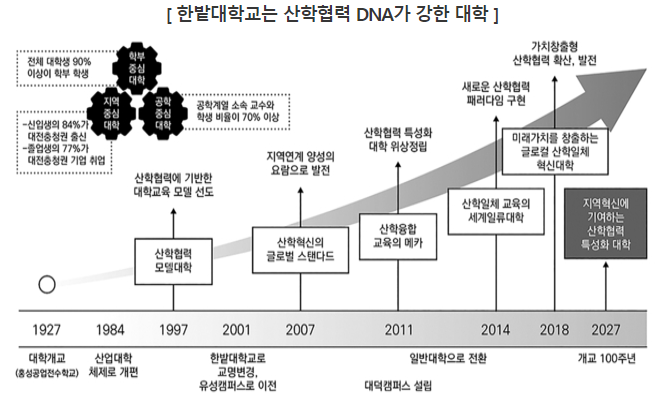

<br>
<br>

- 또한 한밭대학교 내의 LINC+사업단에서는 4차 산업혁명에 대응하는 기업선도형 산학연계교육과정(기술지원, 연구개발 등) 운영과 <br>
  인력양성과 스마트 융복합 산업 플랫폼 구축을 위한 5개의 신산업특화센터(ICC)인 스마트팩토리센터,<br>
  드론융합기술센터, 빅데이터AI센터, 자율주행차센터, 3D프린팅센터를 구축하여 운영하고 있다. <br>
- 그 밖에도 한밭대학교 LINC+사업단에서는 재학생을 위한 다양한 역량강화 교육이나 동아리 지원 등 취 · 창업 지원 프로그램을 통해 재학생을 지원하고, 공동활용장비 지원, 산학협력협의체, 상품화지원프로그램, 산학공동기술개발과제 프로그램 등을 통해 대전 · 충남 지역의 중소기업을 지원하고 있으며, 이를 통한 매년 10개 이상의 특허 출원 및 기술 이전 등의 성과를 창출하여 학교 발전에 이바지 하고, 기업 성장에 기여할 수 있도록 꾸준히 노력하고 있다.

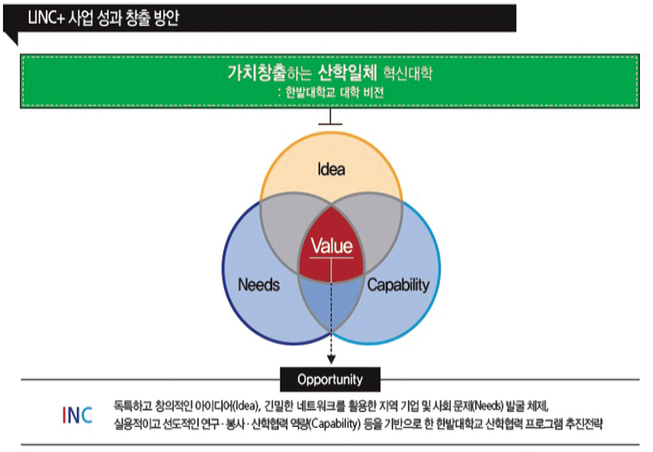

<br>
<br>

- 즉, 체계적이고 미래지향적인 산학협력단과 사업단의 기여로 입학정원의 수가 늘어난 것을 알 수 있다. <br>


<br>
<br>
[출처: 저작권자ⓒ대전일보사]http://www.daejonilbo.com/news/newsitem.asp?pk_no=1452963

In [108]:
df8 = pd.read_excel('2019학년도+4년제+사립+대학+모집단위별+입학정원.xlsx')

df8.rename(columns={'Unnamed: 6': '2017년 입학정원', 'Unnamed: 7': '2016년 입학정원', 'Unnamed: 8': '2015년 입학정원',
                   '분교ㆍ캠퍼스': '분교/캠퍼스'}, inplace=True)
df8 = df8.loc[:, ~df8.columns.str.contains('Unnamed')]
    
max_increase_private = [0, 0]
max_decrease_private = [0, 10000]

for i in range(df8.shape[0]):
    if '대학교' in str(df8.loc[i][0]):
        val = df8.loc[i]['2017년 입학정원'] - df8.loc[i]['2015년 입학정원']
        if max_increase_private[1] < val:
            max_increase_private[1] = val
            max_increase_private[0] = i
        elif max_decrease_private[1] > val:
            max_decrease_private[1] = val
            max_decrease_private[0] = i

x_value = [df8.columns[i] for i in range(2, 5)]
x_value.reverse()
            
fig = go.Figure()
fig.add_trace(go.Bar(
    x=x_value, 
    y=df8.iloc[max_increase_private[0]][4:1:-1], 
    name=df8.loc[max_increase_private[0]][0],
    marker_color='navy'
))
fig.add_trace(go.Scatter(
    x=x_value, 
    y=df8.iloc[max_increase_private[0]][4:1:-1], 
    name=df8.loc[max_increase_private[0]][0],
    marker_color='lightcoral'
))
fig.add_trace(go.Bar(
    x=x_value,
    y=df8.iloc[max_decrease_private[0]][4:1:-1],
    name=df8.loc[max_decrease_private[0]][0],
    marker_color='gold'
))
fig.add_trace(go.Scatter(
    x=x_value,
    y=df8.iloc[max_decrease_private[0]][4:1:-1],
    name=df8.loc[max_decrease_private[0]][0],
    marker_color='red'
))

fig.update_layout(title_text='사립 대학 중 입학정원 변화가 제일 큰 대학', barmode='group', bargap=0.6)
fig.show()

- 사립 대학 중 2017년까지 입학자 수 증가량이 제일 큰 학교는 KC대학교이다.
- 원인을 분석해 본 결과 KC대학교는 캠퍼스타운 사업으로 2017년부터 3년간 사업을 통해 창업인프라를 구축하고 지역연계 프로그램을 구축 및 확산하는 성과를 거두었다고 한다.
- 또한 2020년부터는 서울시 캠퍼스타운 사업 3단계 단위형에 선발되어, 창업육성과 지역상생 분야의 다양한 프로그램을 추진한다고 한다.
- 즉, 창업 중심의 특성화 전략으로 입학자 수의 증가가 나타난 것으로 보인다.

<br>
[출처: 중앙일보] KC대학교 캠퍼스타운 사업, 창업육성 프로그램 추진